In [1]:
import os
from PIL import Image
import pyocr
import numpy as np
import pyocr.builders
import matplotlib.pyplot as plt
import math

In [73]:
target = "normal"
# target = "wide"
# target = "fastlate"

In [3]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

In [74]:
img = Image.open("./" + target + "/target.png")
rgb_img = img.convert('RGB')
size = rgb_img.size

In [75]:
border = 215
yuBorder = size[1] - size[1] / 2
ytBorder = size[1] / 6
xtBorder = size[0] / 2

In [76]:
img2 = Image.new('RGBA',size)

for x in range(size[0]):
    for y in range(size[1]):
        r,g,b = rgb_img.getpixel((x,y))
        
        # 下半分を白
        if y >= yuBorder:
            g = 255
        # 右半分を白
        elif x >= xtBorder:
            g = 255
        # 上側1/6を白
        elif y <= ytBorder:
            g = 255
        # あの色を黒
        elif r == 255 and g == 85 and b == 170:
            g = 0
        # あの色付近を黒(+-30)
        elif 225 <= r <= 255 and 55 <= g <= 115 and 140 <= b <= 200:
            g = 0
        # 後は白
        else:
            g = 255

        img2.putpixel((x,y),(g,g,g,255))

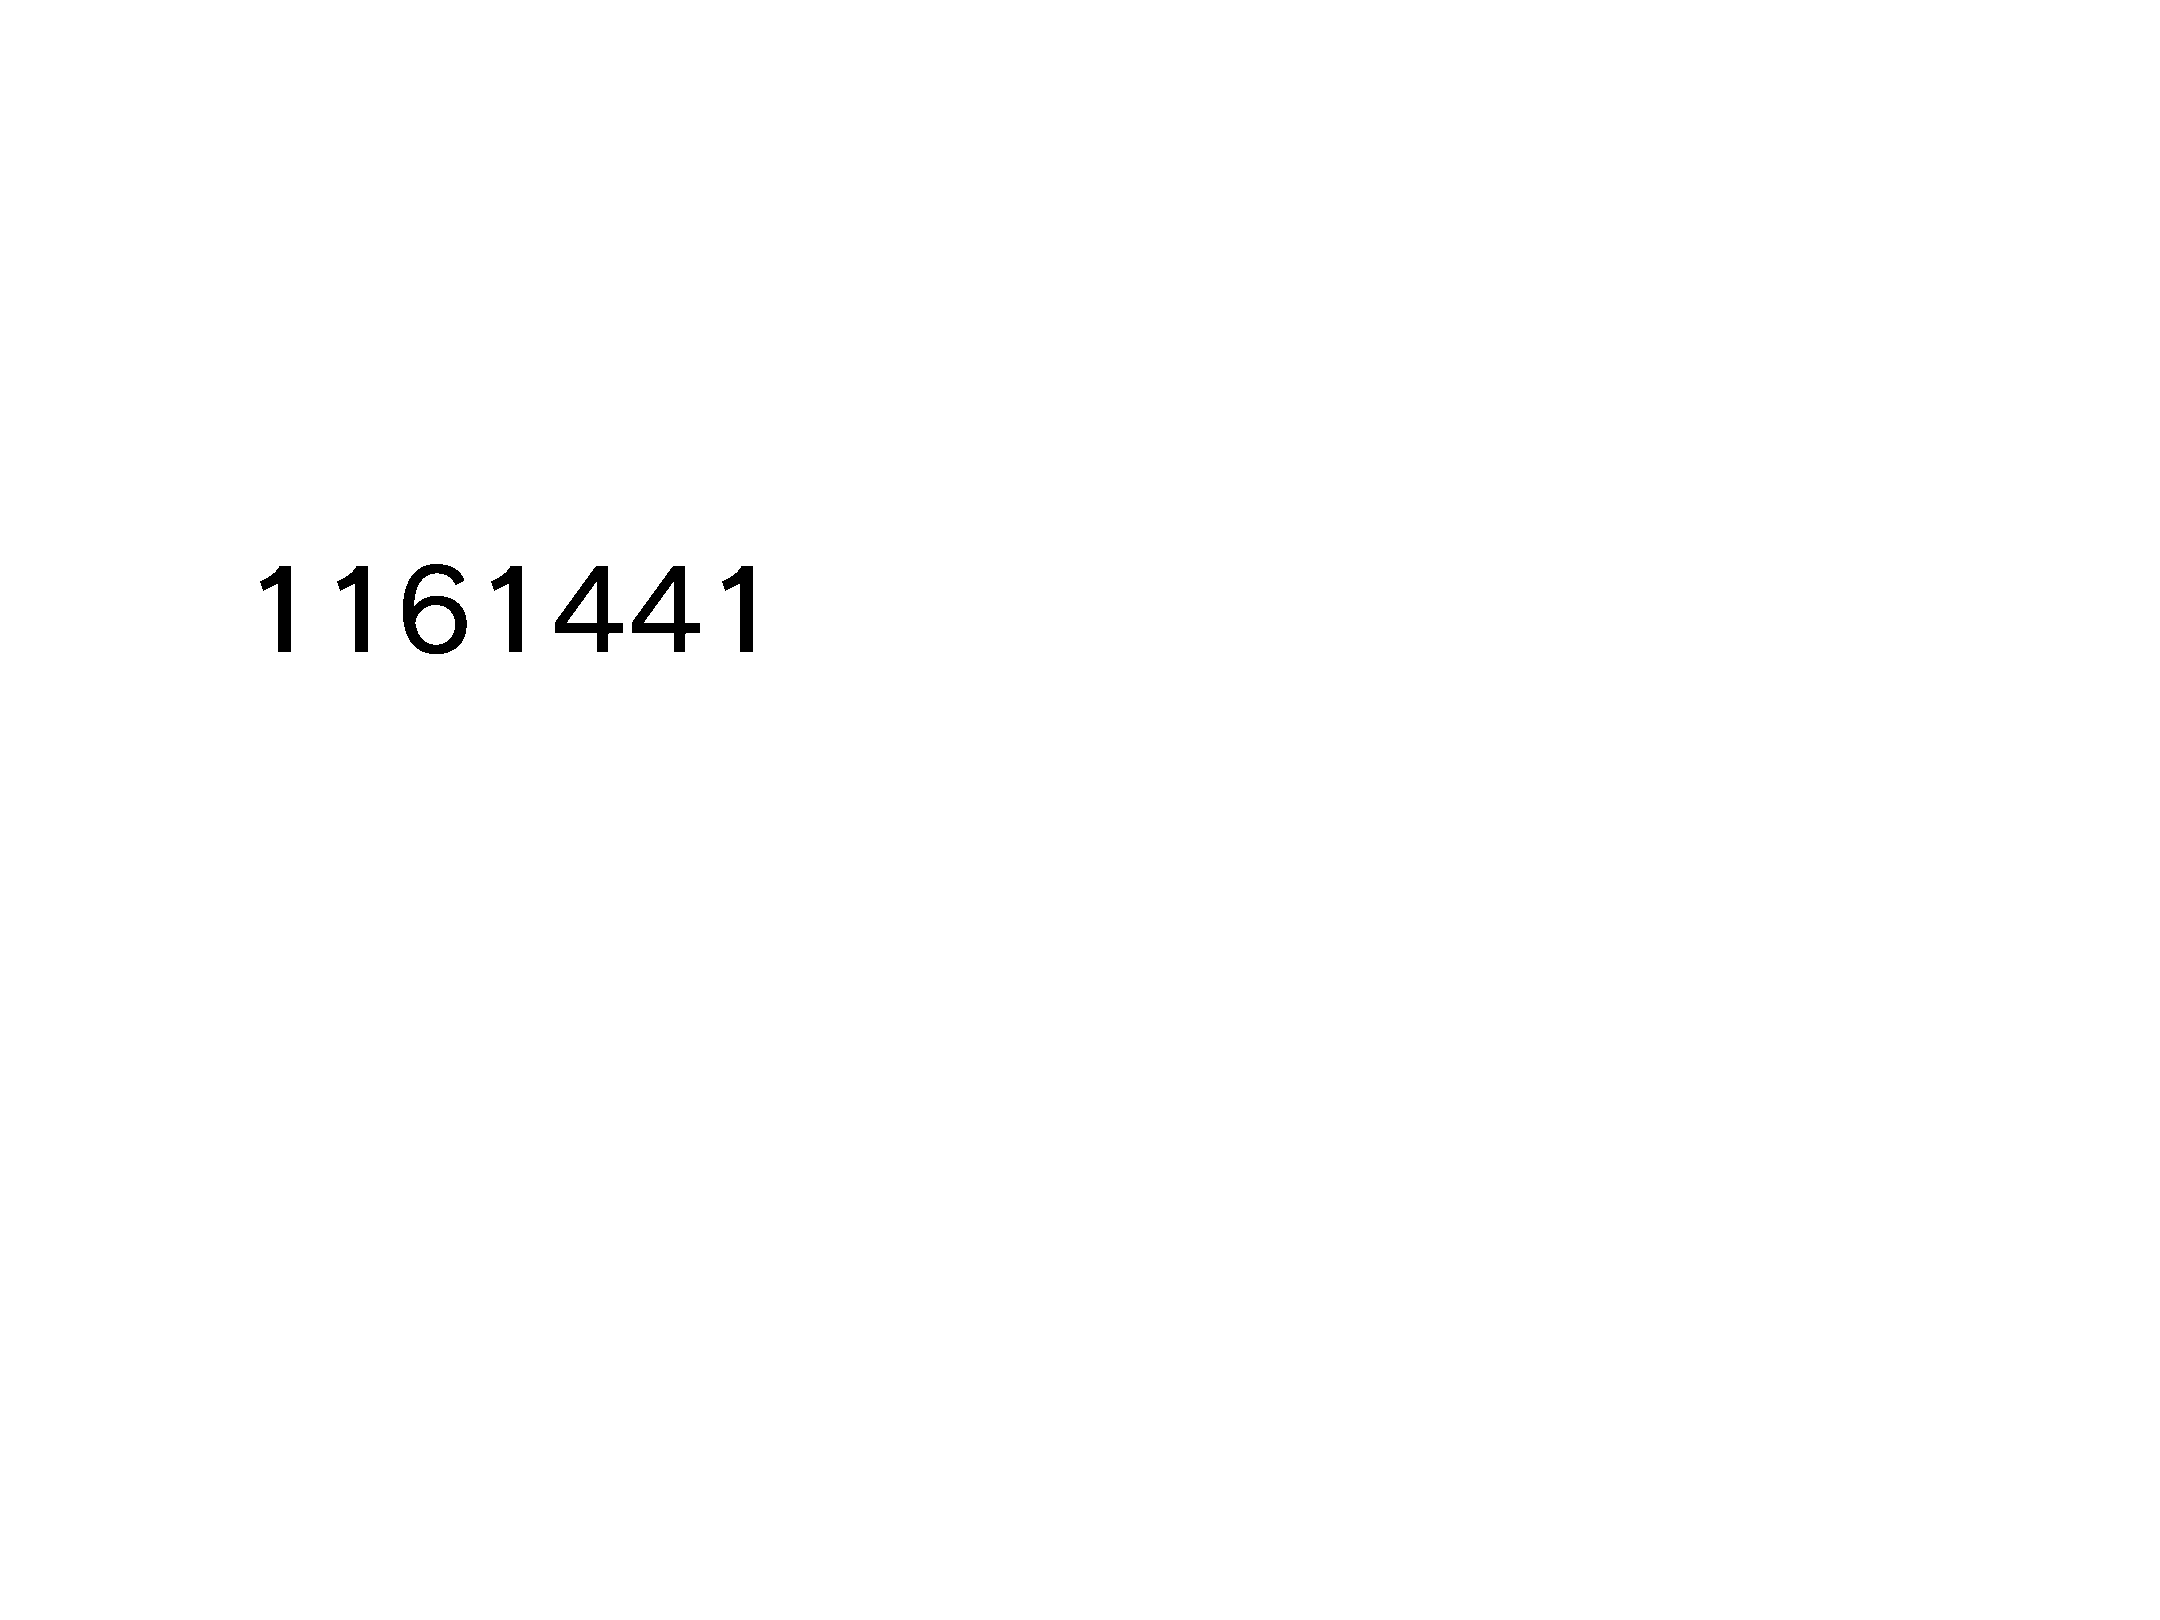

In [77]:
img2.save("./" + target + "/result-score.png")

img2

In [78]:
builder = pyocr.builders.TextBuilder(tesseract_layout=6)
result = tool.image_to_string(img2, lang="eng", builder=builder)

print(result)

1161441
